In [12]:
%pip install pandas

In [13]:
%pip install matplotlib seaborn

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [15]:
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")
pd.set_option('display.max_columns', None)

In [16]:
df_transaksi = pd.read_csv("pembelian.csv", sep=';', encoding='utf-8')
df_stok = pd.read_csv("stok.csv", sep=';', encoding='utf-8')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19232\4122221870.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_transaksi = pd.read_csv("pembelian.csv", sep=';', encoding='utf-8')


In [17]:
print("✅ Data transaksi:", df_transaksi.shape)
print("✅ Data stok:", df_stok.shape)

✅ Data transaksi: (138364, 8)
✅ Data stok: (1517, 5)


In [18]:
df_transaksi.head(5)

,kode,nama product,unit,tgl transaksi,kode transaksi,kategori,qty,nilai
0,A000001,ANATON TAB,STRIP,06-07-21,1.13-210706.0908-003,Masuk,10,2520
1,A000001,ANATON TAB,STRIP,12-07-21,2.6-210712.1519-097,Keluar,1,3000
2,A000001,ANATON TAB,STRIP,12-07-21,2.11-210712.1633-013,Keluar,1,3000
3,A000001,ANATON TAB,STRIP,12-07-21,2.13-210712.1807-013,Keluar,1,3000
4,A000001,ANATON TAB,STRIP,12-07-21,2.11-210712.1855-018,Keluar,1,3000


In [19]:
df_stok.head(5)

,kode,nama product,lokasi,qty,unit
0,A000001,ANATON TAB,ETL1,12,STRIP
1,A00001,ACTIVED HIJAU,ETL3A,2,BTL
2,A000012,APIALYS SYR 100 ML,ETL3A,2,BTL
3,A000014,ALKOHOL 1000 ML,ETL3B,7,BTL
4,A000016,ALLOPURINOL 300,RAK2,40,STRIP


In [20]:
df_transaksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138364 entries, 0 to 138363
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   kode            138364 non-null  object
 1   nama product    138364 non-null  object
 2   unit            138364 non-null  object
 3   tgl transaksi   138364 non-null  object
 4   kode transaksi  138364 non-null  object
 5   kategori        138364 non-null  object
 6   qty             138364 non-null  object
 7   nilai           138364 non-null  object
dtypes: object(8)
memory usage: 8.4+ MB


In [21]:
df_stok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   kode          1517 non-null   object
 1   nama product  1517 non-null   object
 2   lokasi        1517 non-null   object
 3   qty           1517 non-null   int64 
 4   unit          1517 non-null   object
dtypes: int64(1), object(4)
memory usage: 59.4+ KB


In [2]:
import pandas as pd

df_pembelian = pd.read_csv("pembelian.csv", sep=";")
print(df_pembelian.head())


      kode nama product   unit tgl transaksi        kode transaksi kategori  \
0  A000001   ANATON TAB  STRIP      06-07-21  1.13-210706.0908-003    Masuk   
1  A000001   ANATON TAB  STRIP      12-07-21   2.6-210712.1519-097   Keluar   
2  A000001   ANATON TAB  STRIP      12-07-21  2.11-210712.1633-013   Keluar   
3  A000001   ANATON TAB  STRIP      12-07-21  2.13-210712.1807-013   Keluar   
4  A000001   ANATON TAB  STRIP      12-07-21  2.11-210712.1855-018   Keluar   

  qty nilai  
0  10  2520  
1   1  3000  
2   1  3000  
3   1  3000  
4   1  3000  


C:\Users\Elma\AppData\Local\Temp\ipykernel_19344\3920752955.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pembelian = pd.read_csv("pembelian.csv", sep=";")


STEP 1 : Generate kolom kategori 95% dan 5%

In [3]:
# ============================================
# 1. Generate Kolom Kategori (95% vs 5%)
# ============================================
import numpy as np

np.random.seed(42)
df_pembelian["kategori_obat"] = np.random.choice(
    ["Obat Bebas", "Obat Resep Dokter"],
    size=len(df_pembelian),
    p=[0.95, 0.05]
)

# Cek distribusi kategori obat baru
print("=== Distribusi kategori_obat ===")
print(df_pembelian["kategori_obat"].value_counts(normalize=True) * 100)


=== Distribusi kategori_obat ===
kategori_obat
Obat Bebas           95.118672
Obat Resep Dokter     4.881328
Name: proportion, dtype: float64


STEP 2 : Analisis distribusi kategori obat

=== Jumlah Tiap Kategori ===
kategori_obat
Obat Bebas           131610
Obat Resep Dokter      6754
Name: count, dtype: int64

=== Persentase Tiap Kategori (%) ===
kategori_obat
Obat Bebas           95.118672
Obat Resep Dokter     4.881328
Name: proportion, dtype: float64


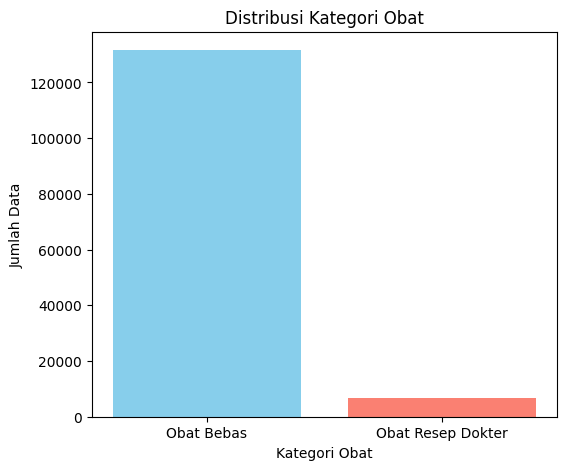

In [4]:
# ============================================
# 2. Analisis Distribusi Kategori Obat
# ============================================

import matplotlib.pyplot as plt

# Hitung distribusi kategori
kategori_counts = df_pembelian["kategori_obat"].value_counts()
kategori_percent = df_pembelian["kategori_obat"].value_counts(normalize=True) * 100

print("=== Jumlah Tiap Kategori ===")
print(kategori_counts)
print("\n=== Persentase Tiap Kategori (%) ===")
print(kategori_percent)

# Visualisasi distribusi kategori
plt.figure(figsize=(6, 5))
plt.bar(kategori_counts.index, kategori_counts.values, color=["skyblue", "salmon"])
plt.title("Distribusi Kategori Obat")
plt.xlabel("Kategori Obat")
plt.ylabel("Jumlah Data")
plt.show()


In [5]:
print(df_pembelian.columns.tolist())

['kode', 'nama product', 'unit', 'tgl transaksi', 'kode transaksi', 'kategori', 'qty', 'nilai', 'kategori_obat']


In [6]:
# ============================================
# 2. Label Encoding untuk Kolom Target
# ============================================
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_pembelian["kategori_obat_encoded"] = le.fit_transform(df_pembelian["kategori_obat"])

# Lihat hasil encoding kategori_obat
print("\n=== Contoh Encoding kategori_obat ===")
print(df_pembelian[["kategori_obat", "kategori_obat_encoded"]].head())


# ============================================
# 3. Persiapan Data Fitur dan Split Train/Test
# ============================================
from sklearn.model_selection import train_test_split

# Pilih kolom fitur (hanya kolom yang relevan & tidak terlalu besar)
kolom_fitur = [
    "qty", 
    "nilai", 
    "kategori", 
    "unit", 
    "nama product"
]

# Ambil data fitur dan target
X = df_pembelian[kolom_fitur].copy()
y = df_pembelian["kategori_obat_encoded"]

# Pastikan kolom kategorikal ditangani dengan efisien (hindari MemoryError)
# Hanya encode kolom kategorikal dengan sedikit nilai unik
kolom_kategorikal = [col for col in X.select_dtypes(include='object').columns if X[col].nunique() < 50]

print("\nKolom kategorikal yang akan di-encode:", kolom_kategorikal)

# One-hot encoding hanya untuk kolom kategorikal kecil
X = pd.get_dummies(X, columns=kolom_kategorikal, drop_first=True)

# Split data (stratify untuk menjaga distribusi kategori seimbang)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n=== Hasil Split Data ===")
print("Train set:", X_train.shape)
print("Test set :", X_test.shape)
print("\nDistribusi kategori pada train set:")
print(y_train.value_counts(normalize=True) * 100)
print("\nDistribusi kategori pada test set:")
print(y_test.value_counts(normalize=True) * 100)



=== Contoh Encoding kategori_obat ===
       kategori_obat  kategori_obat_encoded
0         Obat Bebas                      0
1  Obat Resep Dokter                      1
2         Obat Bebas                      0
3         Obat Bebas                      0
4         Obat Bebas                      0

Kolom kategorikal yang akan di-encode: ['kategori']

=== Hasil Split Data ===
Train set: (110691, 5)
Test set : (27673, 5)

Distribusi kategori pada train set:
kategori_obat_encoded
0    95.118844
1     4.881156
Name: proportion, dtype: float64

Distribusi kategori pada test set:
kategori_obat_encoded
0    95.117985
1     4.882015
Name: proportion, dtype: float64


In [8]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
import imblearn
print(imblearn.__version__)


0.14.0


STEP 3 : Resampling (oversampling)

In [10]:
# ============================================
# 4. Resampling (Oversampling)
# ============================================
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Cek dulu proporsi sebelum oversampling
print("🔹 Sebelum Oversampling:")
print(y_train.value_counts(normalize=True) * 100)

# Inisialisasi RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Terapkan oversampling ke data train
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# Cek hasil setelah oversampling
print("\n🔹 Setelah Oversampling:")
print(y_train_res.value_counts(normalize=True) * 100)

# Gabungkan hasil jadi dataframe baru (opsional)
df_train_balanced = pd.concat([X_train_res, y_train_res], axis=1)

print("\nUkuran data sebelum:", X_train.shape)
print("Ukuran data sesudah :", X_train_res.shape)


🔹 Sebelum Oversampling:
kategori_obat_encoded
0    95.118844
1     4.881156
Name: proportion, dtype: float64

🔹 Setelah Oversampling:
kategori_obat_encoded
0    50.0
1    50.0
Name: proportion, dtype: float64

Ukuran data sebelum: (110691, 5)
Ukuran data sesudah : (210576, 5)


<Figure size 800x500 with 0 Axes>

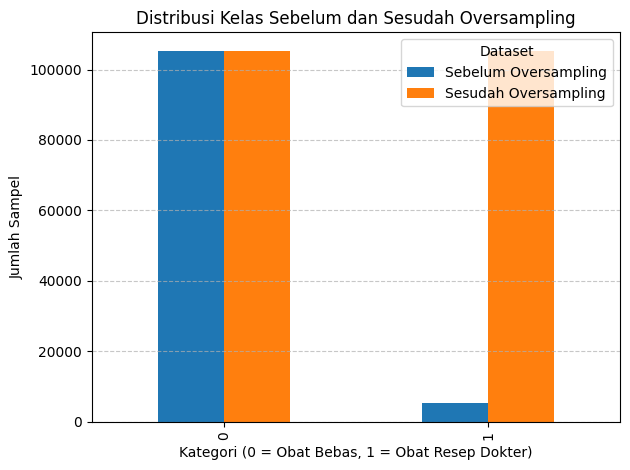

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# === Distribusi sebelum oversampling ===
before = y_train.value_counts(normalize=False)

# === Distribusi sesudah oversampling ===
after = pd.Series(y_train_res).value_counts(normalize=False)

# Buat DataFrame gabungan untuk visualisasi
df_compare = pd.DataFrame({
    'Sebelum Oversampling': before,
    'Sesudah Oversampling': after
})

# Plot bar chart
plt.figure(figsize=(8, 5))
df_compare.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Distribusi Kelas Sebelum dan Sesudah Oversampling')
plt.xlabel('Kategori (0 = Obat Bebas, 1 = Obat Resep Dokter)')
plt.ylabel('Jumlah Sampel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Dataset', loc='upper right')
plt.tight_layout()
plt.show()


STEP 4 : Modeling dengan Logistic Regression (Algorithm-Level)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
# Pastikan kolom numerik benar-benar numerik
df_pembelian['nilai'] = df_pembelian['nilai'].astype(str).str.replace(',', '.')
df_pembelian['qty'] = df_pembelian['qty'].astype(str).str.replace(',', '.')

# Ubah ke tipe float
df_pembelian['nilai'] = pd.to_numeric(df_pembelian['nilai'], errors='coerce')
df_pembelian['qty'] = pd.to_numeric(df_pembelian['qty'], errors='coerce')

# Hapus baris yang null (kalau ada setelah konversi)
df_pembelian = df_pembelian.dropna(subset=['nilai', 'qty'])


=== Confusion Matrix ===
[[26322     0]
 [ 1351     0]]


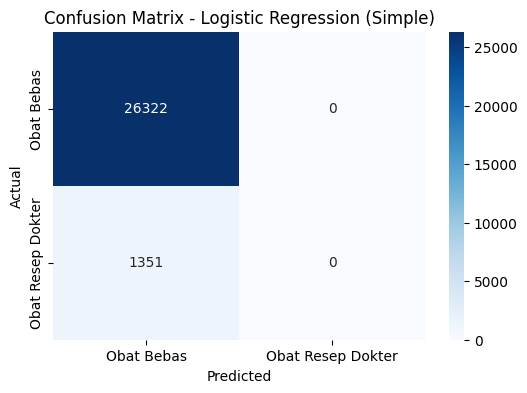

In [40]:
# ============================================
# 5. Modeling: Logistic Regression (Simple)
# ============================================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Fitur dan target
X = df_pembelian[['nilai', 'qty']]
y = df_pembelian['kategori_obat_encoded']

# Split data ke train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Inisialisasi model
model = LogisticRegression(max_iter=1000, random_state=42)

# Latih model
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Obat Bebas', 'Obat Resep Dokter'], yticklabels=['Obat Bebas', 'Obat Resep Dokter'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (Simple)')
plt.show()

STEP 5 : Hybrid Methods (oversampling + class weight)

=== Confusion Matrix (Hybrid) ===
[[ 9739 16583]
 [  514   837]]


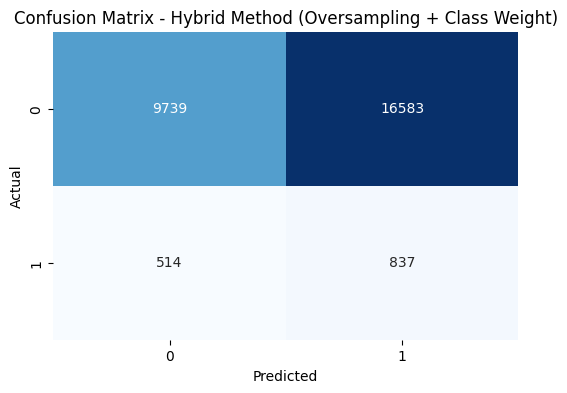

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === Model Hybrid: Oversampling + Class Weight ===
hybrid_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

# Latih model dengan data hasil oversampling
hybrid_model.fit(X_train_res, y_train_res)

# Prediksi data test
y_pred_hybrid = hybrid_model.predict(X_test)

# Evaluasi hasil
print("=== Confusion Matrix (Hybrid) ===")
print(confusion_matrix(y_test, y_pred_hybrid))

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_hybrid),
            annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Hybrid Method (Oversampling + Class Weight)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


STEP 6 : Evaluasi khusus untuk imbalanced data (precision, recall, F1-score, dan ROC-AUC)

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Baseline model evaluation (simple Logistic Regression)
y_proba_baseline = model.predict_proba(X_test)[:, 1]
print("=== Baseline Logistic Regression ===")
print(classification_report(y_test, y_pred, digits=4, zero_division=0))
print(f"ROC-AUC (baseline): {roc_auc_score(y_test, y_proba_baseline):.4f}\n")

# Hybrid model evaluation (Oversampling + Class Weight)
print("=== Hybrid (Oversampling + Class Weight) ===")
print(classification_report(y_test, y_pred_hybrid, digits=4, zero_division=0))
print(f"ROC-AUC (hybrid): {roc_auc_score(y_test, y_proba_hybrid):.4f}\n")

# Compact summary (precision, recall, f1 for positive class and macro-avg)
pos = 1
print("Compact summary:")
print(f"Baseline  - Precision (pos={pos}): {precision_score(y_test, y_pred, pos_label=pos, zero_division=0):.4f}, "
    f"Recall: {recall_score(y_test, y_pred, pos_label=pos, zero_division=0):.4f}, "
    f"F1: {f1_score(y_test, y_pred, pos_label=pos, zero_division=0):.4f}")
print(f"Hybrid    - Precision (pos={pos}): {precision_score(y_test, y_pred_hybrid, pos_label=pos, zero_division=0):.4f}, "
    f"Recall: {recall_score(y_test, y_pred_hybrid, pos_label=pos, zero_division=0):.4f}, "
    f"F1: {f1_score(y_test, y_pred_hybrid, pos_label=pos, zero_division=0):.4f}")

=== Baseline Logistic Regression ===
              precision    recall  f1-score   support

           0     0.9512    1.0000    0.9750     26322
           1     0.0000    0.0000    0.0000      1351

    accuracy                         0.9512     27673
   macro avg     0.4756    0.5000    0.4875     27673
weighted avg     0.9047    0.9512    0.9274     27673

ROC-AUC (baseline): 0.4993

=== Hybrid (Oversampling + Class Weight) ===
              precision    recall  f1-score   support

           0     0.9499    0.3700    0.5325     26322
           1     0.0480    0.6195    0.0892      1351

    accuracy                         0.3822     27673
   macro avg     0.4990    0.4948    0.3109     27673
weighted avg     0.9058    0.3822    0.5109     27673

ROC-AUC (hybrid): 0.4934

Compact summary:
Baseline  - Precision (pos=1): 0.0000, Recall: 0.0000, F1: 0.0000
Hybrid    - Precision (pos=1): 0.0480, Recall: 0.6195, F1: 0.0892
